In [104]:
import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk

In [105]:
class Window(tk.Tk):
    def __init__(self):
        super().__init__()

        self.artikelButton = tk.Button(self, text="verdeling van artikelen", command=self.on_artikelButton)
        self.consoleButton = tk.Button(self, text="aantal consoles per uitgave jaar", command=self.on_consoleButton)
        self.title("Game Paradise Data Visualization")
        self.geometry("400x400")

        self.artikelButton.pack()
        self.consoleButton.pack()

    def on_artikelButton(self):
        # artikelWindow is defined in het volgende codescherm
        ArtikelWindow(self)

    def on_consoleButton(self):
        ConsoleWindow(self)




hier boven maak ik de class Window. Dit is het scherm waar de applicatie op gaat starten. Op dit scherm staan 2 buttons. Deze buttons leiden naar een vervolg scherm door middel van de funties on_artikelButton() en on_consoleButton(). Ik heb voor nu gekozen om een nieuw scherm te laten open omdat dit makkelijker is om alles te testen. Daarnaast maakt dit de workflow ook makkelijker omdat je zo makkelijk kan switchen van data dat je wilt weergeven.

## technieken
 - All classes have a function called __init__(), which is always executed when the class is being initiated.

In [106]:
class ArtikelWindow(tk.Toplevel):
    def __init__(self, master):
        super().__init__(master)

        self.taartButton = tk.Button(self, text="Ik wil de data in een taart diagram zien!", command=self.on_taartButton)
        self.barButton = tk.Button(self, text="Ik wil de data in een bar chart zien!", command=self.on_barButton)

        self.taartButton.pack()
        self.barButton.pack()

    def on_taartButton(self):
        fig, ax = plt.subplots()
        labels = ["Spellen", "Consoles"]
        colSpel = ["TITEL"]
        colConsole = ["TYPE"]
        dataSpel = pd.read_csv('Artikel.csv', usecols=colSpel, encoding='latin-1')
        dataConsole = pd.read_csv('Artikel.csv', usecols=colConsole, encoding='latin-1')
        dataConsole.dropna(inplace=True)
        dataSpel.dropna(inplace=True)
        val = [dataSpel.size, dataConsole.size]
        ax.pie(val, labels = labels, startangle = 90, autopct='%1.1f%%')

        ax.set_title("Pie chart over de verdeling van alle artikelen!")

        createWindow(fig)

    def on_barButton(self):
        fig, ax = plt.subplots()
        labels = ["Spellen", "Consoles"]
        colSpel = ["TITEL"]
        colConsole = ["TYPE"]
        dataSpel = pd.read_csv('Artikel.csv', usecols=colSpel, encoding='latin-1')
        dataConsole = pd.read_csv('Artikel.csv', usecols=colConsole, encoding='latin-1')

        dataConsole.dropna(inplace=True)
        dataSpel.dropna(inplace=True)
        name = ["spel", "Console"]
        val = [dataSpel.size, dataConsole.size]

        ax.bar(name, val)
        ax.set_title("Bar chart over de verdeling tussen consoles en artikelen!")

        createWindow(fig)

        


 Toplevel is a widget that represents a top-level window. It is a container widget that can contain other widgets, and can be used to create separate windows within a Tkinter application.

In [107]:
class ConsoleWindow(tk.Toplevel):
    def __init__(self, master):
        super().__init__(master)

        self.taartButton = tk.Button(self, text="Ik wil de data in een taart diagram zien!", command=self.on_taartButton)
        self.barButton = tk.Button(self, text="Ik wil de data in een bar chart zien!", command=self.on_barButton)

        self.taartButton.pack()
        self.barButton.pack()
        
    def on_taartButton(self):
        fig, ax = plt.subplots()
        col = ["JAAR_UITGAVE"]
        data = pd.read_csv('console.csv', usecols=col)
        xUnique = num.unique(data)
        count = data.value_counts()
        y = []
        for i in xUnique:
            y.append(count.get(i))
        
        ax.pie(y, labels = xUnique, startangle = 90, autopct='%1.1f%%')

        ax.set_title("Aantal console releases per jaar")

        createWindow(fig)

    def on_barButton(self):
        fig, ax = plt.subplots()
        col = ["JAAR_UITGAVE"]
        data = pd.read_csv('console.csv', usecols=col)
        xUnique = num.unique(data)
        count = data.value_counts()
        y = []
        for i in xUnique:
            y.append(count.get(i))

        ax.bar(xUnique, y)
        ax.set_ylabel("Aantal")
        ax.set_xlabel("Jaar")
        ax.set_title("Aantal console releases per jaar")
        
        createWindow(fig)


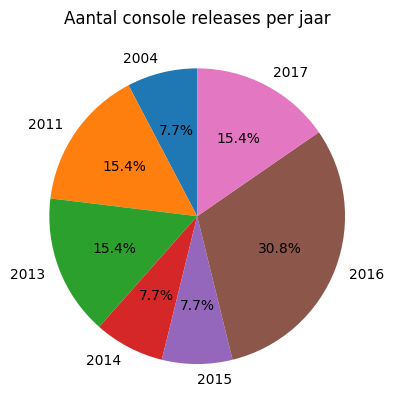

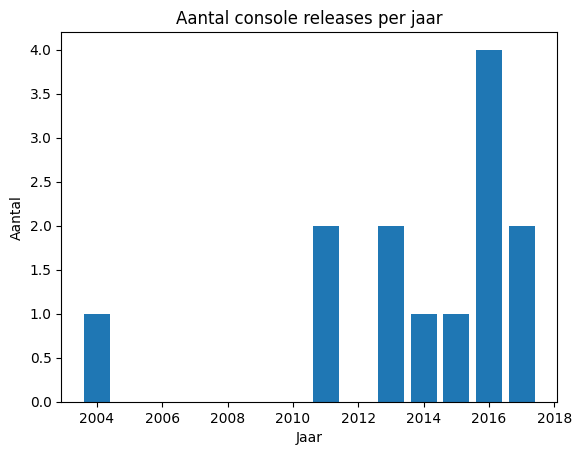

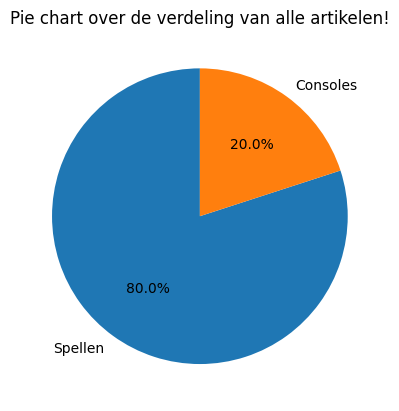

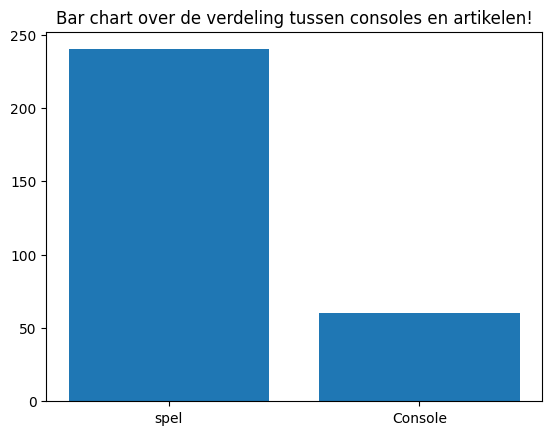

In [108]:
# global function
def createWindow(figure):
        diaFrame = tk.Tk()

        canvas = FigureCanvasTkAgg(figure, diaFrame)
        canvas.draw()

        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        tk.mainloop()     


if __name__ == "__main__":
    window = Window()
    window.mainloop()